<a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>


https://www.kaggle.com/c/santander-customer-satisfaction/data

# Data Load

In [ ]:
import gdown
import os
import pandas as pd
from sklearn.model_selection import train_test_split

def get_santan_dataset():
# https://drive.google.com/file/d/1oxHidcYjhx6HzOYMZ-l493nuz2AHpjz-/view?usp=sharing
#     https://drive.google.com/file/d/1rlN0N9wVQIKL1HMWvrH5I8y9jrqzZUpu/view?usp=sharing
    google_path = 'https://drive.google.com/uc?id='
    file_id_train = '1oxHidcYjhx6HzOYMZ-l493nuz2AHpjz-'
    file_id_test = '1rlN0N9wVQIKL1HMWvrH5I8y9jrqzZUpu'

    gdown.download(google_path+file_id_train,'santan_train.csv',quiet=False)
    gdown.download(google_path+file_id_test,'santan_test.csv',quiet=False)
    
    X = pd.read_csv('santan_train.csv')
    X_sub = pd.read_csv('santan_test.csv')
    y = X.iloc[:,[-1]]
    X = X.iloc[:,:-1]
    

    
    os.remove('santan_train.csv')
    os.remove('santan_test.csv')
    
    return X, y, X_sub

X, y, X_sub = get_santan_dataset()

라이브러리 임포트

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.style.use(['seaborn-whitegrid'])

In [14]:
import warnings
warnings.filterwarnings('ignore')

# Lookup

In [15]:
X

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 370 entries, ID to var38
dtypes: float64(111), int64(259)
memory usage: 214.6 MB


In [17]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   TARGET  76020 non-null  int64
dtypes: int64(1)
memory usage: 594.0 KB


In [21]:
y_count = y.value_counts()
y_count

TARGET
0         73012
1          3008
dtype: int64

## Target 비율 확인

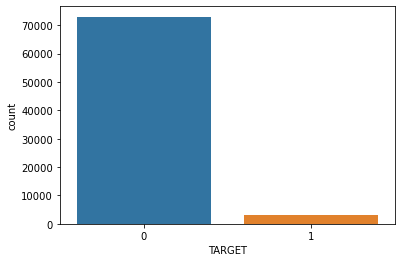

In [19]:
sns.countplot(y.TARGET);

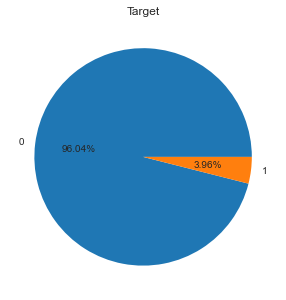

In [30]:
plt.figure(figsize=(10, 5))
plt.pie(x=y_count.tolist(), labels=['0','1'], autopct='%0.2f%%')
plt.title('Target');

In [32]:
X.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,76020.0,75964.050723,43781.947379,1.00,38104.7500,76043.00,113748.7500,151838.00
var3,76020.0,-1523.199277,39033.462364,-999999.00,2.0000,2.00,2.0000,238.00
var15,76020.0,33.212865,12.956486,5.00,23.0000,28.00,40.0000,105.00
imp_ent_var16_ult1,76020.0,86.208265,1614.757313,0.00,0.0000,0.00,0.0000,210000.00
imp_op_var39_comer_ult1,76020.0,72.363067,339.315831,0.00,0.0000,0.00,0.0000,12888.03
...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,76020.0,31.505324,2013.125393,0.00,0.0000,0.00,0.0000,438329.22
saldo_medio_var44_hace3,76020.0,1.858575,147.786584,0.00,0.0000,0.00,0.0000,24650.01
saldo_medio_var44_ult1,76020.0,76.026165,4040.337842,0.00,0.0000,0.00,0.0000,681462.90
saldo_medio_var44_ult3,76020.0,56.614351,2852.579397,0.00,0.0000,0.00,0.0000,397884.30


* `var3` : min 값과 mean 값이 수상하다.

* 370개의 컬럼이 있으니 확인 해야 한다. 

* ID는 필요 없는 컬럼이다. 


* 전체적으로 확인이 필요해 보인다. 


In [40]:
X.drop('ID', inplace=True, axis=1)

In [35]:
# sns.pairplot(X)
# 너무 많아서 그릴수 가 없다. 

In [36]:
# X.hist()
# 너무 많아서 그릴수 가 없다. 

<AxesSubplot:>

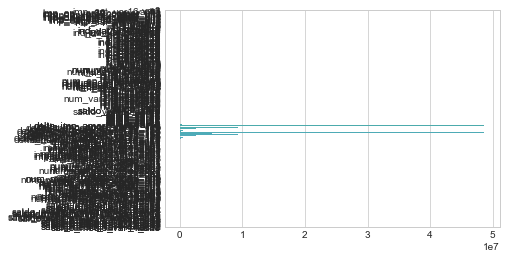

In [59]:
sns.barplot(x = X.mean(), y=X.columns)

<AxesSubplot:>

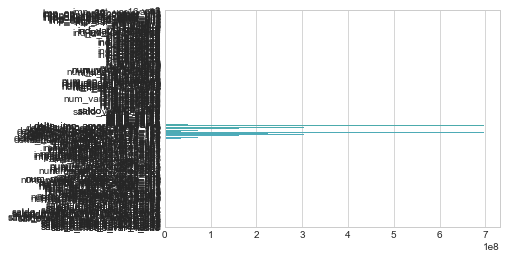

In [50]:
sns.barplot(x = X.std(), y=X.columns)

<AxesSubplot:>

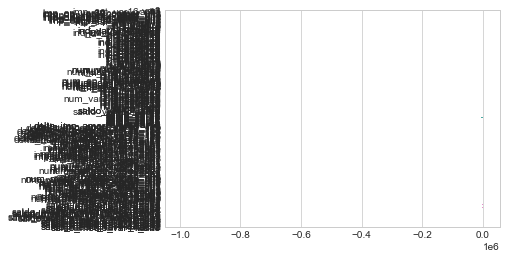

In [51]:
sns.barplot(x = X.min(), y=X.columns)

<AxesSubplot:>

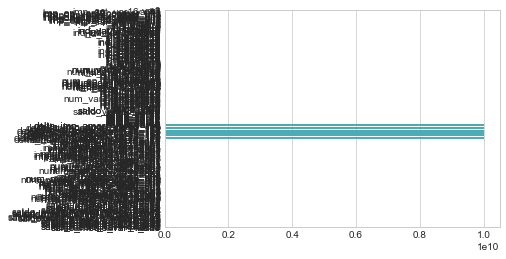

In [52]:
sns.barplot(x = X.max(), y=X.columns)

In [58]:
(X.std() > 100000).sum()

27

<AxesSubplot:xlabel='var3', ylabel='Count'>

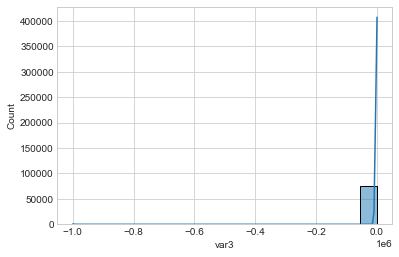

In [62]:
sns.histplot(X.var3, kde=True)

**Reference**

* <a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>

<br>

* 파이썬 머신러닝 완벽 가이드, 권철민